# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

# Описание данных

**Признаки** 
* `RowNumber` — индекс строки в данных


* `CustomerId` — уникальный идентификатор клиента


* `Surname` — фамилия


* `CreditScore` — кредитный рейтинг


* `Geography` — страна проживания


* `Gender` — пол


* `Age` — возраст


* `Tenure` — сколько лет человек является клиентом банка


* `Balance` — баланс на счёте


* `NumOfProducts` — количество продуктов банка, используемых клиентом


* `HasCrCard` — наличие кредитной карты


* `IsActiveMember` — активность клиента


* `EstimatedSalary` — предполагаемая зарплата

**Целевой признак**
* `Exited` — факт ухода клиента

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Импорт-используемых-библиотек" data-toc-modified-id="Импорт-используемых-библиотек-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Импорт используемых библиотек</a></span></li><li><span><a href="#Чтение-файла-с-данными" data-toc-modified-id="Чтение-файла-с-данными-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Чтение файла с данными</a></span></li><li><span><a href="#Изучение-общей-информации" data-toc-modified-id="Изучение-общей-информации-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Изучение общей информации</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Подготовка-признаков" data-toc-modified-id="Подготовка-признаков-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Подготовка признаков</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Алгоритм-решающего-дерева" data-toc-modified-id="Алгоритм-решающего-дерева-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Алгоритм решающего дерева</a></span></li><li><span><a href="#Алгоритм-случайного-леса" data-toc-modified-id="Алгоритм-случайного-леса-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Алгоритм случайного леса</a></span></li><li><span><a href="#Алгоритм-логистической-регрессии" data-toc-modified-id="Алгоритм-логистической-регрессии-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Алгоритм логистической регрессии</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Параметр-class_weight" data-toc-modified-id="Параметр-class_weight-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Параметр class_weight</a></span></li><li><span><a href="#Увеличение-выборки" data-toc-modified-id="Увеличение-выборки-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Увеличение выборки</a></span></li><li><span><a href="#Уменьшение-выборки" data-toc-modified-id="Уменьшение-выборки-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Уменьшение выборки</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li></ul></div>

## Подготовка данных

### Импорт используемых библиотек

In [245]:
# импорт библиотеки pandas
import pandas as pd

# импорт библиотеки matplotlib
import matplotlib.pyplot as plt

# импорт функции train_test_split из библиотеки sklearn
from sklearn.model_selection import train_test_split 

# импорт алгоритма решающего дерева из библиотеки sklearn
from sklearn.tree import DecisionTreeClassifier

# импорт алгоритма случайного леса из библиотеки sklearn
from sklearn.ensemble import RandomForestClassifier

# импорт алгоритма логистической регрессии из библиотеки sklearn
from sklearn.linear_model import LogisticRegression

# импорт метода стандартизации данных из библиотеки sklearn
from sklearn.preprocessing import StandardScaler

# импорт случайного поиска по гиперпараметрам из библиотеки sklearn
from sklearn.model_selection import RandomizedSearchCV

# импорт кросс-валидации из библиотеки sklearn
from sklearn.model_selection import cross_val_score

# импорт расчёта значения f1-меры из библиотеки sklearn
from sklearn.metrics import f1_score

# импорт перемешивания объектов из библиотеки sklearn
from sklearn.utils import shuffle

# импорт расчёта метрики AUC-ROC из библиотеки sklearn
from sklearn.metrics import roc_auc_score

### Чтение файла с данными

In [246]:
# чтение файла с данными
df = pd.read_csv('/datasets/Churn.csv')

### Изучение общей информации

In [247]:
# получение первых 10 строк датасета
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


In [248]:
# получение общей информации о данных датасета
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             9091 non-null float64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [249]:
# получение описательной статистики данных датасета
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Целью проекта является прогноз вероятности ухода клиента из банка в ближайшее время, поэтому столбцы с информацией об индексе строки в данных, уникальном идентификаторе клиента и фамилии клиента не только не важны, но и могут оказывать негативное воздействие на точность построения модели.

**Проведем предобработку данных:**
* удалим столбцы: `RowNumber`, `CustomerId`и `Surname`,


* приведем названия всех столбцов к нижнему регистру,


* приведем названия столбцов `CreditScore`, `NumOfProducts`, `HasCrCard`, `IsActiveMember` и `EstimatedSalary` к змеиному регистру


* устраним пропуски в столбце `Tenure`,


* сменим тип данных в столбцах `Tenure`, `Balance` и `EstimatedSalary` на целочисленный, т.к. для обучения модели это будет проще, а некоторое округление значений не внесет сильных ошибок,


* проверим данные на наличие дубликатов.

### Предобработка данных

Удалим лишние столбцы.

In [250]:
# удаление столбцов
df =  df.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1)

Приведем названия столбцов к общепринятому виду.

In [251]:
# приведение названий столбцов к нижнему регистру
df.columns = df.columns.str.lower()

In [252]:
# переименование столбцов
df = df.rename(columns={
    'creditscore': 'credit_score', 
    'numofproducts': 'num_of_products', 
    'hascrcard': 'has_cr_card',
    'isactivemember': 'is_active_member', 
    'estimatedsalary': 'estimated_salary',
})

In [253]:
# получение первых 5 строк датасета
df.head()

,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


Так как в столбце `tenure`, который демонстрирует сколько лет человек является клиентом банка, имеются пропущенные значения, устраним пропуски.

In [254]:
# подсчёт пропусков
df['tenure'].isna().sum()

909

In [255]:
# подсчёт доли пропусков от общего количества данных
df['tenure'].isna().sum() / df.shape[0] * 100

9.09

Пропущенных значений порядка 9%. Это много, поэтому просто исключить строки с пропущенными значениями будет неверно. Заменим пропущенные данные медианным значением.

In [256]:
# заполнение пропущенных значений
df['tenure'] = df['tenure'].fillna(df['tenure'].median())

In [257]:
# подсчёт пропусков
df.isna().sum()

credit_score        0
geography           0
gender              0
age                 0
tenure              0
balance             0
num_of_products     0
has_cr_card         0
is_active_member    0
estimated_salary    0
exited              0
dtype: int64

Теперь, когда пропуски отсутствуют, заменим типы данных.

In [258]:
# изменение типа данных
df = df.astype({'tenure': "int64", 
                    'balance': "int64",
                    'estimated_salary': "int64"
                   })

In [259]:
# получение общей информации о данных датасета
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
credit_score        10000 non-null int64
geography           10000 non-null object
gender              10000 non-null object
age                 10000 non-null int64
tenure              10000 non-null int64
balance             10000 non-null int64
num_of_products     10000 non-null int64
has_cr_card         10000 non-null int64
is_active_member    10000 non-null int64
estimated_salary    10000 non-null int64
exited              10000 non-null int64
dtypes: int64(9), object(2)
memory usage: 859.5+ KB


In [260]:
# получение описательной статистики данных датасета
df.describe()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
count,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,4.99790,76485.571500,1.530200,0.70550,0.515100,100089.748400,0.203700
std,96.653299,10.487806,2.76001,62397.185107,0.581654,0.45584,0.499797,57510.491042,0.402769
min,350.000000,18.000000,0.00000,0.000000,1.000000,0.00000,0.000000,11.000000,0.000000
25%,584.000000,32.000000,3.00000,0.000000,1.000000,0.00000,0.000000,51001.750000,0.000000
50%,652.000000,37.000000,5.00000,97198.000000,1.000000,1.00000,1.000000,100193.500000,0.000000
75%,718.000000,44.000000,7.00000,127643.750000,2.000000,1.00000,1.000000,149387.750000,0.000000
max,850.000000,92.000000,10.00000,250898.000000,4.000000,1.00000,1.000000,199992.000000,1.000000


Проверим датасет на наличие дубликатов.

In [261]:
# проверка на наличие дубликатов
df.duplicated().sum()

0

### Подготовка признаков

В нашем датасете присутствуют категориальные признаки в столбцах `geography` и `gender`. Для обучения модели подходят только численные данные.

Посмотрим сначала какие категирии есть и как распределены.

In [262]:
# получение уникальных значений и их количества
df['geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: geography, dtype: int64

(-1.25, 1.25, -1.25, 1.25)

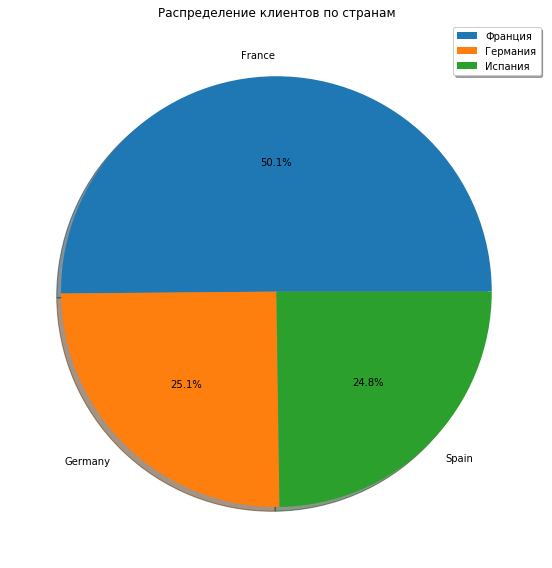

In [263]:
# построение круговой диаграммы
df['geography'].value_counts().plot(kind='pie', autopct='%1.1f%%', shadow=True, figsize=(10,8))
plt.legend(['Франция', 'Германия', 'Испания'], fontsize=10, shadow=True, facecolor='w')
plt.title('Распределение клиентов по странам')
plt.tight_layout()
plt.axis('off')

In [264]:
# получение уникальных значений и их количества
df['gender'].value_counts()

Male      5457
Female    4543
Name: gender, dtype: int64

(-1.25, 1.25, -1.25, 1.25)

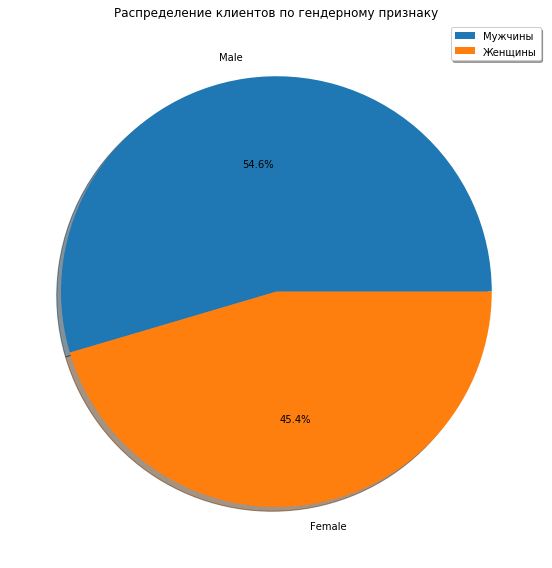

In [265]:
# построение круговой диаграммы
df['gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', shadow=True, figsize=(10,8))
plt.legend(['Мужчины', 'Женщины'], fontsize=10, shadow=True, facecolor='w')
plt.title('Распределение клиентов по гендерному признаку')
plt.tight_layout()
plt.axis('off')

Преобразовать категориальные признаки в численные поможет техника прямого кодирования, или отображения One-Hot Encoding. Но у такоего кодирования есть недостаток: из-за переизбытка данных можно угодить в ловушку фиктивных признаков. Чтобы этого избежать, один столбец с признаками удалим, т.к. его всегда можно восстановить по оставшимся.

In [266]:
# преобразование категориальных признаков прямым кодированием
df_ohe = pd.get_dummies(df, drop_first=True)

In [267]:
# получение первых 5 строк датасета
df_ohe.head()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited,geography_Germany,geography_Spain,gender_Male
0,619,42,2,0,1,1,1,101348,1,0,0,0
1,608,41,1,83807,1,0,1,112542,0,0,1,0
2,502,42,8,159660,3,1,0,113931,1,0,0,0
3,699,39,1,0,2,0,0,93826,0,0,0,0
4,850,43,2,125510,1,1,1,79084,0,0,1,0


В данных присутствуют колличественные признаки с разными разбросами значений, поэтому алгорим может решить, что признаки с
большими значениями и разбросом важнее. Чтобы избежать этой ловушки, признаки масштабируются — приводятся к одному масштабу.
Один из методов масштабирования — стандартизации данных. 

Перед масштабированием необходимо разделить данные.

Спрятанной тестовой выборки нет. Значит, данные нужно разбить на три части: обучающую, валидационную и тестовую. Размеры тестового и валидационного наборов обычно равны. Исходные данные разбивают в соотношении 3:1:1.
Разобъем исходные данные на:
- обучающую выборку (60%)
- тестовую выборку (20%)
- валидационную выборку (20%)

In [268]:
# выделение валидационной выборки
df_total, df_valid = train_test_split(df_ohe, test_size=0.2, random_state=12345)

In [269]:
# разделите данные на обучающую и тестовую выборки
df_train, df_test = train_test_split(df_total, test_size=0.25, random_state=12345)

In [270]:
# проверка размера выборок
df_train.shape[0], df_test.shape[0], df_valid.shape[0]

(6000, 2000, 2000)

In [271]:
# создание переменные для признаков и целевого признака
features_train = df_train.drop(['exited'], axis=1)
target_train = df_train['exited']
features_valid = df_valid.drop(['exited'], axis=1)
target_valid = df_valid['exited']
features_test = df_test.drop(['exited'], axis=1)
target_test = df_test['exited']

In [272]:
# проверка размера выборок признаков
features_train.shape, features_valid.shape, features_test.shape

((6000, 11), (2000, 11), (2000, 11))

Данные разделены успешно, перейдем к стандартизации данных.

In [273]:
# При записи изменённых признаков в исходный датафрейм код может вызывать предупреждение SettingWithCopy.
# Причина в особенности поведения sklearn и pandas.
# Специалисты уже привыкли игнорировать такое сообщение.
# Чтобы предупреждение не появлялось, в код добавляют строчку:
pd.options.mode.chained_assignment = None

In [274]:
# признаки для масштабирования
numeric = ['credit_score', 'age', 'tenure', 'balance', 'num_of_products', 'estimated_salary']

# стандартизация данных
scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

### Выводы

Была проведена следующая подготовка данных и признаков:

* столбцы `RowNumber`, `CustomerId`и `Surname` были удалены, т.к. они лишь увеличивали размерность данных не неся при этом полезную информацию для построения модели;


* названия всех столбцов к нижнему змеинному регистру;


* пропуски в столбце `tenure` заменены на медианное значение количества лет, в течение которого клиент пользуется услугами банка;


* типы данных в столбцах `tenure`, `balance` и `estimated_salary` изменены на целочисленный тип, т.к. для обучения модели это будет проще, а некоторое округление значений не внесет сильных ошибок;


* данные были проверены на наличие дубликатов, которые, как оказалось, отсутствуют;


* категориальные признаки были перекодированы с помощью прямого кодирования;


* датасет был разделен на обучающую, тестовую и валидационную  выборки в пропорции 3:1:1;


* произведена стандартизация данных.

## Исследование задачи

Дисбаланс классов плохо сказывается на обучении модели. Классы несбалансированны, когда их соотношение далеко от 1:1. Баланс классов наблюдается, если их количество примерно равно.

Проверим данные на дисбаланс классов.

0    0.796833
1    0.203167
Name: exited, dtype: float64


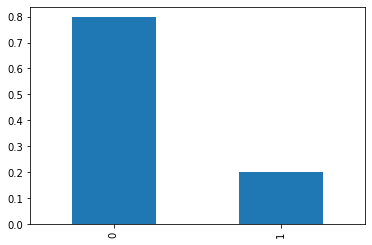

In [275]:
# проверка баланса классов
class_frequency = target_train.value_counts(normalize= 2)
print(class_frequency)
class_frequency.plot(kind='bar')

В классах заметный дисбаланс, 80% клиентов из банка не уходят. Попробуем обучить модель, несмотря на дисбаланс.

### Алгоритм решающего дерева

In [276]:
%%time
dtc = DecisionTreeClassifier(random_state = 12345)
parameters_dtc = {'criterion': ['gini', 'entropy'], # критерий
                 'max_depth': range(1, 50), # глубина дерева
                 'min_samples_leaf': range(1, 20), # минимальное количесто объектов в листе
                 'max_features': range(1, features_train.shape[1]+1)} # максимальное количество фич
search_dtc = RandomizedSearchCV(dtc, parameters_dtc, cv=5, n_jobs = -1, scoring = 'f1')
search_dtc.fit(features_train, target_train)
best_dtc = search_dtc.best_estimator_

f1_score_val_dtc = cross_val_score(best_dtc, features_valid, target_valid, scoring = 'f1', cv = 10, n_jobs = -1)   
auc_roc_val_dtc = cross_val_score(best_dtc, features_valid, target_valid, scoring = 'roc_auc', cv = 10, n_jobs = -1)

print('F1-score для Decision Tree на валидационной выборке:', sum(f1_score_val_dtc)/len(f1_score_val_dtc))
print('AUC-ROC для Decision Tree на валидационной выборке:', sum(auc_roc_val_dtc)/len(auc_roc_val_dtc))

F1-score для Decision Tree на валидационной выборке: 0.5805233164497656
AUC-ROC для Decision Tree на валидационной выборке: 0.8075164115172722
CPU times: user 1.32 s, sys: 3.92 ms, total: 1.32 s
Wall time: 1.32 s


### Алгоритм случайного леса

In [279]:
%%time
rfc = RandomForestClassifier(random_state = 12345)
parameters_rfc = {'n_estimators': range(1, 200, 10), # количество деревьев 
                 'criterion': ['gini', 'entropy'], # критерий
                 'max_depth':range(1, 50, 1), # глубина дерева
                 'min_samples_leaf': range(1, 10), # минимальное количесто объектов в листе
                 'max_features': range(1, features_train.shape[1]+1)} # максимальное количество фич
search_rfc = RandomizedSearchCV(rfc, parameters_rfc, cv=5, n_jobs = -1, scoring = 'f1')
search_rfc.fit(features_train, target_train)
best_rfc = search_rfc.best_estimator_

f1_score_val_rfc = cross_val_score(best_rfc, features_valid, target_valid, scoring = 'f1', cv = 10, n_jobs = -1)   
auc_roc_val_rfc = cross_val_score(best_rfc, features_valid, target_valid, scoring = 'roc_auc', cv = 10, n_jobs = -1)

print('F1-score для Random Forest на валидационной выборке:', sum(f1_score_val_rfc)/len(f1_score_val_rfc))
print('AUC-ROC для Random Forest на валидационной выборке:', sum(auc_roc_val_rfc)/len(auc_roc_val_rfc))

F1-score для Random Forest на валидационной выборке: 0.5879758142144859
AUC-ROC для Random Forest на валидационной выборке: 0.8657131767767041
CPU times: user 36.7 s, sys: 114 ms, total: 36.8 s
Wall time: 37.6 s


### Алгоритм логистической регрессии

In [280]:
%%time
lr = LogisticRegression(random_state = 12345)
parameters_lr = {'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 5, 10, 20, 50], # обратная сила регуляризации
                 'penalty':['l1'], # Регуляризация 
                 'solver':['liblinear', 'saga']} # функция потерь

search_lr = RandomizedSearchCV(lr, parameters_lr, cv=5, n_jobs = -1, scoring = 'f1')
search_lr.fit(features_train, target_train)
best_lr = search_lr.best_estimator_

f1_score_val_lr = cross_val_score(best_lr, features_valid, target_valid, scoring = 'f1', cv = 10, n_jobs = -1)   
auc_roc_val_lr = cross_val_score(best_lr, features_valid, target_valid, scoring = 'roc_auc', cv = 10, n_jobs = -1) 

print('F1-score для Logistic Regression на валидационной выборке:', sum(f1_score_val_lr)/len(f1_score_val_lr))
print('AUC-ROC для Logistic Regression на валидационной выборке:', sum(auc_roc_val_lr)/len(auc_roc_val_lr))

F1-score для Logistic Regression на валидационной выборке: 0.29391299254813974
AUC-ROC для Logistic Regression на валидационной выборке: 0.7644361664009949
CPU times: user 6 s, sys: 4.32 s, total: 10.3 s
Wall time: 10.3 s


### Выводы

In [281]:
df_non_balance = [['decision_tree', 
                     sum(f1_score_val_dtc)/len(f1_score_val_dtc), sum(auc_roc_val_dtc)/len(auc_roc_val_dtc)], 
                    ['random_forest', 
                     sum(f1_score_val_rfc)/len(f1_score_val_rfc), sum(auc_roc_val_rf)/len(auc_roc_val_rf)], 
                    ['logistic_regression', 
                     sum(f1_score_val_lr)/len(f1_score_val_lr), sum(auc_roc_val_lr)/len(auc_roc_val_lr)]]
columns_non_balance = ['model', 'f1_non_balance', 'auc_roc_non_balance']
table_non_balance = pd.DataFrame(data = df_non_balance, columns = columns_non_balance)
table_non_balance

,model,f1_non_balance,auc_roc_non_balance
0,decision_tree,0.580523,0.807516
1,random_forest,0.587976,0.865949
2,logistic_regression,0.293913,0.764436


Были определены гиперпараметры, необходимые для достижения максимально возможной F1 меры для трех алгоритмов. Наибольшим значением обладает модель случайного леса, близким значением обладает модель решающего дерева, а логистическая регрессия показала наихудший результат.
Для дальнейшего рассмотрения исключим логистическую регрессию.

Устраним дисбаланс и проверим как это скажется на характеристике модели.

## Борьба с дисбалансом

У нас три пути решения этой проблемы:

* Добавить в модель параметр class_weight
* Увеличение выборки
* Уменьшение выборки

Реализуем все 3 способа поочередно

### Параметр class_weight

Алгоритм решающего дерева.

In [282]:
%%time
dtc_balanced = DecisionTreeClassifier(random_state = 12345, class_weight = 'balanced')
search_dtc_balanced = RandomizedSearchCV(dtc_balanced, parameters_dtc, cv=5, n_jobs = -1, scoring = 'f1')
search_dtc_balanced.fit(features_train, target_train)
best_dtc_balanced = search_dtc_balanced.best_estimator_

f1_score_val_dtc_b = cross_val_score(best_dtc_balanced, features_valid, target_valid, scoring = 'f1', cv = 10, n_jobs = -1)   
auc_roc_val_dtc_b = cross_val_score(best_dtc_balanced, features_valid, target_valid, scoring = 'roc_auc', cv = 10, n_jobs = -1)

print('F1-score для Decision Tree (balanced) на валидационной выборке:', sum(f1_score_val_dtc_b)/len(f1_score_val_dtc_b))
print('AUC-ROC для Decision Tree (balanced) на валидационной выборке:', sum(auc_roc_val_dtc_b)/len(auc_roc_val_dtc_b))

F1-score для Decision Tree (balanced) на валидационной выборке: 0.5781909605734598
AUC-ROC для Decision Tree (balanced) на валидационной выборке: 0.8161224077802774
CPU times: user 1.68 s, sys: 0 ns, total: 1.68 s
Wall time: 1.69 s


Алгоритм случайного леса.

In [283]:
%%time
rfc_balanced = RandomForestClassifier(random_state = 12345, class_weight = 'balanced')
search_rfc_balanced = RandomizedSearchCV(rfc_balanced, parameters_rfc, cv=5, n_jobs = -1, scoring = 'f1')
search_rfc_balanced.fit(features_train, target_train)
best_rfc_balanced = search_rfc_balanced.best_estimator_

f1_score_val_rfc_b = cross_val_score(best_rfc_balanced, features_valid, target_valid, scoring = 'f1', cv = 10, n_jobs = -1)   
auc_roc_val_rfc_b = cross_val_score(best_rfc_balanced, features_valid, target_valid, scoring = 'roc_auc', cv = 10, n_jobs = -1)

print('F1-score для Random Forest (balanced) на валидационной выборке:', sum(f1_score_val_rfc_b)/len(f1_score_val_rfc_b))
print('AUC-ROC для Random Forest (balanced) на валидационной выборке:', sum(auc_roc_val_rfc_b)/len(auc_roc_val_rfc_b))

F1-score для Random Forest (balanced) на валидационной выборке: 0.6357832708333333
AUC-ROC для Random Forest (balanced) на валидационной выборке: 0.8690144937784764
CPU times: user 1min 24s, sys: 218 ms, total: 1min 25s
Wall time: 1min 27s


### Увеличение выборки

In [284]:
# функция для увеличения выборки
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 4)
target_upsampled.value_counts()

1    4876
0    4781
Name: exited, dtype: int64

Алгоритм решающего дерева.

In [285]:
%%time
search_dtc.fit(features_upsampled, target_upsampled)
best_dtc_us = search_dtc.best_estimator_

f1_score_val_dtc_us = cross_val_score(best_dtc_us, features_valid, target_valid, scoring = 'f1', cv = 10, n_jobs = -1)   
auc_roc_val_dtc_us = cross_val_score(best_dtc_us, features_valid, target_valid, scoring = 'roc_auc', cv = 10, n_jobs = -1)

print('F1-score для Decision Tree (upsampled) на валидационной выборке:', sum(f1_score_val_dtc_us)/len(f1_score_val_dtc_us))
print('AUC-ROC для Decision Tree (upsampled) на валидационной выборке:', sum(auc_roc_val_dtc_us)/len(auc_roc_val_dtc_us))

F1-score для Decision Tree (upsampled) на валидационной выборке: 0.532595795327597
AUC-ROC для Decision Tree (upsampled) на валидационной выборке: 0.7377457776665864
CPU times: user 1.78 s, sys: 3.76 ms, total: 1.79 s
Wall time: 1.79 s


Алгоритм случайного леса.

In [286]:
%%time
search_rfc.fit(features_upsampled, target_upsampled)
best_rfc_us = search_rfc.best_estimator_

f1_score_val_rfc_us = cross_val_score(best_rfc_us, features_valid, target_valid, scoring = 'f1', cv = 10, n_jobs = -1)   
auc_roc_val_rfc_us = cross_val_score(best_rfc_us, features_valid, target_valid, scoring = 'roc_auc', cv = 10, n_jobs = -1)

print('F1-score для Random Forest (upsampled) на валидационной выборке:', sum(f1_score_val_rfc_us)/len(f1_score_val_rfc_us))
print('AUC-ROC для Random Forest (upsampled) на валидационной выборке:', sum(auc_roc_val_rfc_us)/len(auc_roc_val_rfc_us))

F1-score для Random Forest (upsampled) на валидационной выборке: 0.575133095671313
AUC-ROC для Random Forest (upsampled) на валидационной выборке: 0.8497256964319977
CPU times: user 1min 7s, sys: 204 ms, total: 1min 7s
Wall time: 1min 9s


### Уменьшение выборки

In [287]:
# функция для уменьшения выборки
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.255)
target_downsampled.value_counts()

1    1219
0    1219
Name: exited, dtype: int64

Алгоритм решающего дерева.

In [288]:
%%time
search_dtc.fit(features_downsampled, target_downsampled)
best_dtc_ds = search_dtc.best_estimator_

f1_score_val_dtc_ds = cross_val_score(best_dtc_ds, features_valid, target_valid, scoring = 'f1', cv = 10, n_jobs = -1)   
auc_roc_val_dtc_ds = cross_val_score(best_dtc_ds, features_valid, target_valid, scoring = 'roc_auc', cv = 10, n_jobs = -1)

print('F1-score для Decision Tree (downsampled) на валидационной выборке:', sum(f1_score_val_dtc_ds)/len(f1_score_val_dtc_ds))
print('AUC-ROC для Decision Tree (downsampled) на валидационной выборке:', sum(auc_roc_val_dtc_ds)/len(auc_roc_val_dtc_ds))

F1-score для Decision Tree (downsampled) на валидационной выборке: 0.5727722683832781
AUC-ROC для Decision Tree (downsampled) на валидационной выборке: 0.8036801191866825
CPU times: user 896 ms, sys: 4.03 ms, total: 900 ms
Wall time: 905 ms


Алгоритм случайного леса.

In [289]:
%%time
search_rfc.fit(features_downsampled, target_downsampled)
best_rfc_ds = search_rfc.best_estimator_

f1_score_val_rfc_ds = cross_val_score(best_rfc_ds, features_valid, target_valid, scoring = 'f1', cv = 10, n_jobs = -1)   
auc_roc_val_rfc_ds = cross_val_score(best_rfc_ds, features_valid, target_valid, scoring = 'roc_auc', cv = 10, n_jobs = -1)

print('F1-score для Random Forest (downsampled) на валидационной выборке:', sum(f1_score_val_rfc_ds)/len(f1_score_val_rfc_ds))
print('AUC-ROC для Random Forest (downsampled) на валидационной выборке:', sum(auc_roc_val_rfc_ds)/len(auc_roc_val_rfc_ds))

F1-score для Random Forest (downsampled) на валидационной выборке: 0.5867557389461552
AUC-ROC для Random Forest (downsampled) на валидационной выборке: 0.8631305620429593
CPU times: user 24.1 s, sys: 127 ms, total: 24.2 s
Wall time: 25.3 s


### Выводы

In [290]:
df_balance = [['decision_tree', sum(f1_score_val_dtc)/len(f1_score_val_dtc), 
               sum(f1_score_val_dtc_b)/len(f1_score_val_dtc_b), 
               sum(f1_score_val_dtc_us)/len(f1_score_val_dtc_us), 
               sum(f1_score_val_dtc_ds)/len(f1_score_val_dtc_ds)], 
              ['random_forest', sum(f1_score_val_rfc)/len(f1_score_val_rfc), 
               sum(f1_score_val_rfc_b)/len(f1_score_val_rfc_b), 
               sum(f1_score_val_rfc_us)/len(f1_score_val_rfc_us), 
               sum(f1_score_val_rfc_ds)/len(f1_score_val_rfc_ds)]] 
columns_balance = ['model', 'f1_non_balance', 'f1_balance', 'f1_upsample', 'f1_downsample']
table_balance = pd.DataFrame(data = df_balance, columns = columns_balance)
table_balance

,model,f1_non_balance,f1_balance,f1_upsample,f1_downsample
0,decision_tree,0.580523,0.578191,0.532596,0.572772
1,random_forest,0.587976,0.635783,0.575133,0.586756


Учитывая дисбаланс класса, мы смогли достичь большего значения F1-меры. При этом для обеих моделей эффективнее всего было учитывывать дисбаланс через настройку модели.

## Тестирование модели

Так как наилучший результат показала модель случайного леса с балансом классов, настроенном через параметры модели, тестировать будем её.

In [294]:
predictions = best_rfc_balanced.predict(features_test)
f1_score(target_test, predictions)

probabilities_valid = best_rfc_balanced.predict_proba(features_test)
probabilities_one_valid = probabilities_valid[:, 1]
roc_auc_score(target_test, probabilities_one_valid)

print('F1-score для Random Forest (balanced) на тестовой выборке:', f1_score(target_test, predictions))
print('AUC-ROC для Random Forest (balanced) на тестовой выборке:', roc_auc_score(target_test, probabilities_one_valid))

F1-score для Random Forest (balanced) на тестовой выборке: 0.6143790849673203
AUC-ROC для Random Forest (balanced) на тестовой выборке: 0.852048658520884


В ходе работы были найдена наилучшая модель, которая на тестовых данных показала значения метрики F1 больше, чем 0.59. Такой моделью оказалась модель случайного леса с балансом классов, настроенном через параметры модели. Таким образом, необходимая задача была выполнена.